In [3]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

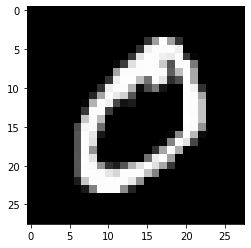

In [8]:
plt.imshow(x_train[1], cmap="gray")

In [10]:
x_train[0].shape

(28, 28)

In [12]:
x_train = x_train/255.0
x_test = x_test/255.0

In [14]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [75]:
encode_input =  keras.Input(shape =(28,28,1), name="img")
x = keras.layers.Flatten()(encode_input)
x = keras.layers.Dense(512, activation="relu")(x)
x = keras.layers.Dense(128, activation="relu")(x)
encoder_out = keras.layers.Dense(64, activation="relu")(x)

encoder = keras.Model(encode_input, encoder_out, name="encoder")
decoder_inp = keras.layers.Dense(64, activation="relu")(encoder_out)
decoder_inp = keras.layers.Dense(128, activation="relu")(encoder_out)
decoder_inp = keras.layers.Dense(512, activation="relu")(encoder_out)
decoder_inp = keras.layers.Dense(784, activation="relu")(decoder_inp)
decoder_out = keras.layers.Reshape((28,28,1))(decoder_inp)

In [76]:
opt = keras.optimizers.Adam(learning_rate=0.001)

In [77]:
autoencoder = keras.Model(encode_input, decoder_out, name="autoencoder")
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_18 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_19 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_22 (Dense)             (None, 512)               33280     
_________________________________________________________________
dense_23 (Dense)             (None, 784)               

In [78]:
autoencoder.compile(opt, loss="mse")

In [79]:
autoencoder.fit(x_train, x_train, epochs = 3, batch_size=32, verbose = 1, validation_split=0.1 )

Epoch 1/3
1688/1688 [==============================] - 11s 6ms/step - loss: 0.0172 - val_loss: 0.0123
Epoch 2/3
1688/1688 [==============================] - 13s 8ms/step - loss: 0.0112 - val_loss: 0.0107
Epoch 3/3
1688/1688 [==============================] - 13s 8ms/step - loss: 0.0102 - val_loss: 0.0100


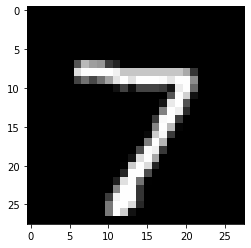

In [80]:
plt.imshow(x_test[0], cmap="gray")

In [81]:
ans = encoder.predict([x_test[0].reshape(-1,28,28,1)])[0]

In [82]:
ans.shape

(64,)

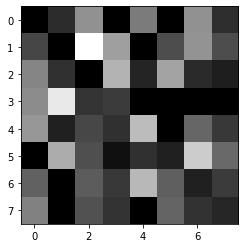

In [83]:
plt.imshow(ans.reshape(8,8,1), cmap="gray")

In [84]:
fans = autoencoder.predict([x_test[0].reshape(-1,28,28,1)])[0]

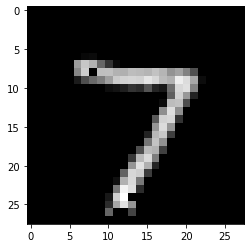

In [85]:
plt.imshow(fans, cmap = "gray")